In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/spotify_tracks.csv")

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [3]:
cols_needed = ["track_name", "artists", "track_genre", "popularity",
               "danceability", "energy", "valence", "tempo"]

df = df[cols_needed].dropna()
df.head()

,track_name,artists,track_genre,popularity,danceability,energy,valence,tempo
0,Comedy,Gen Hoshino,acoustic,73.0,0.676,0.4610,0.715,87.917
1,Ghost - Acoustic,Ben Woodward,acoustic,55.0,0.420,0.1660,0.267,77.489
2,To Begin Again,Ingrid Michaelson;ZAYN,acoustic,57.0,0.438,0.3590,0.120,76.332
3,Can't Help Falling In Love,Kina Grannis,acoustic,71.0,0.266,0.0596,0.143,181.740
4,Hold On,Chord Overstreet,acoustic,82.0,0.618,0.4430,0.167,119.949


In [17]:
genre_pop = df.groupby("track_genre")["popularity"].mean().sort_values(ascending=False).head(10)
genre_pop

,popularity
track_genre,
chill,53.651000
anime,48.772000
deep-house,44.808000
brazil,44.670000
dubstep,44.517073
ambient,44.191000
british,43.802000
acoustic,42.483000
dub,40.039000


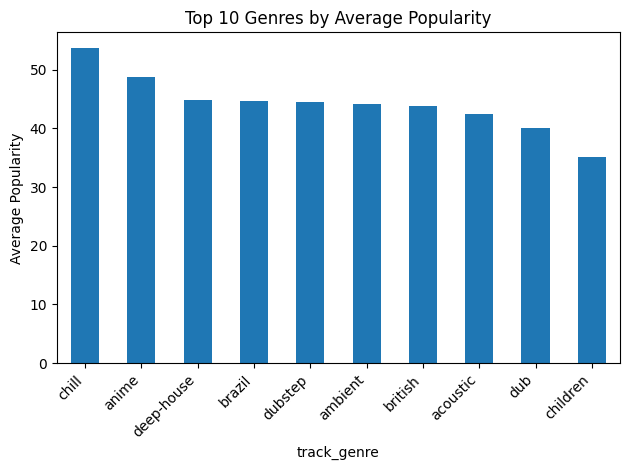

In [15]:
#Top 10 genres bar chart

plt.figure()
genre_pop.plot(kind="bar")
plt.title("Top 10 Genres by Average Popularity")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("genre_popularity.png")
plt.show()

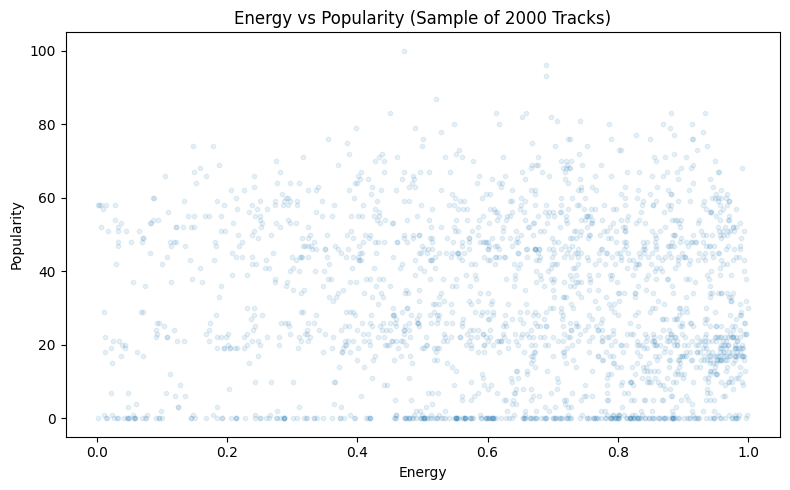

,energy,popularity
energy,1.00000,-0.06674
popularity,-0.06674,1.00000


In [9]:
# Compare energy with popularity

sample = df.sample(2000, random_state=42)  # reduce clutter

plt.figure(figsize=(8,5))
plt.scatter(sample["energy"], sample["popularity"], alpha=0.1, s=10)
plt.title("Energy vs Popularity (Sample of 2000 Tracks)")
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.tight_layout()
plt.savefig("energy_popularity.png")
plt.show()

df[["energy", "popularity"]].corr() # show correlation

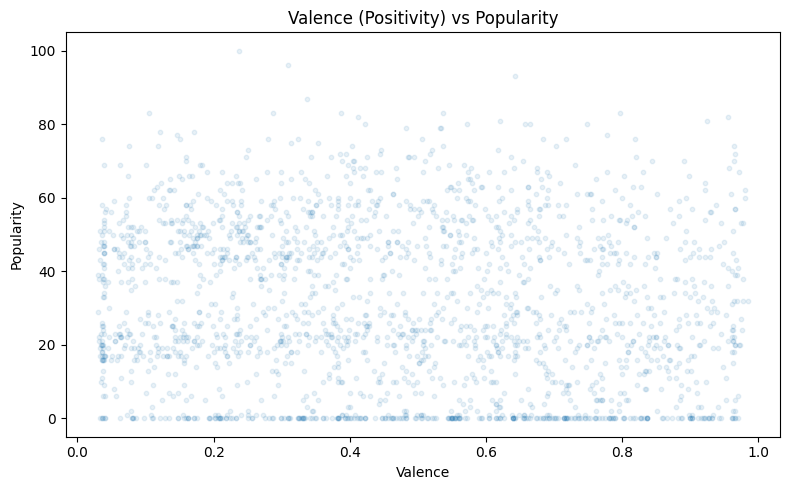

,valence,popularity
valence,1.000000,-0.082317
popularity,-0.082317,1.000000


In [11]:
# Compare valence with popularity

sample = df.sample(2000, random_state=42)

plt.figure(figsize=(8,5))
plt.scatter(sample["valence"], sample["popularity"], alpha=0.1, s=10)
plt.title("Valence (Positivity) vs Popularity")
plt.xlabel("Valence")
plt.ylabel("Popularity")
plt.tight_layout()
plt.savefig("valence_popularity.png")
plt.show()

df[["valence", "popularity"]].corr()